In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
import xlsxwriter

#Change this for each participant
part_number = '203'

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [9, 4.5]  # Bigger images
plt.rcParams['font.size']= 14
pd.set_option('display.max_columns', None)

save_dir = '../data/part'+part_number+'/figures/'

p = '../data/part'+part_number+'/part'+part_number+'_pilot_ecg_signals.p'
ecg = pickle.load(open(p,"rb"))
eda = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_eda_signals.p',"rb"))
rsp = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_rsp_signals.p',"rb"))
baseline_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_ecg_signals.p'
baseline2_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_eda_signals.p'
baseline3_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_rsp_signals.p'
ecg_baseline = pickle.load(open(baseline_fn,"rb"))
eda_baseline = pickle.load(open(baseline2_fn,"rb"))
rsp_baseline = pickle.load(open(baseline3_fn,"rb"))

data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})

timestamps=np.loadtxt('../support/trigger timestamps/trigger timestamps.csv',dtype='int',delimiter=',')
start_times = timestamps[int(part_number[-2:]) - 1]
feedback_times = timestamps[int(part_number[-2:]) - 1 + 15]

taskloads_all = np.loadtxt('../support/taskload settings/taskload settings.csv',dtype='int',delimiter=',',encoding='UTF-8')
taskload_settings = taskloads_all[int(part_number[-2:]) - 1]

durations = [100,100,100,100,100,100,100,100,100,100,100,100]
#durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

events = {}
events['onset'] = start_times
events['duration'] = durations
events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events['condition'] =  taskload_settings
#events['trust'] = trust_settings DOES NOT WORK!

events_feedback = {}
events_feedback['onset'] = feedback_times
events_feedback['duration'] = durations
events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events_feedback['condition'] =  taskload_settings

ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)

ecg_trust_interval = nk.epochs_create(ecg,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
eda_trust_interval = nk.epochs_create(eda,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
rsp_trust_interval = nk.epochs_create(rsp,events,sampling_rate=rate,epochs_start=50,epochs_end=70)

ecg_trust_event = nk.epochs_create(ecg,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
eda_trust_event = nk.epochs_create(eda,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
rsp_trust_event = nk.epochs_create(rsp,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)

pi_high_tl = {}
hc=1
pi_med_tl = {}
mc=1
pi_low_tl = {}
lc=1
for i in range(1,13):
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = ecg_pilot_interval[i]
        hc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = ecg_pilot_interval[i]
        mc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = ecg_pilot_interval[i]
        lc+=1

for i in range(1,13):
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = eda_pilot_interval[i]
        hc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = eda_pilot_interval[i]
        mc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = eda_pilot_interval[i]
        lc+=1
            
for i in range(1,13):
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = rsp_pilot_interval[i]
        hc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = rsp_pilot_interval[i]
        mc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = rsp_pilot_interval[i]
        lc+=1
        
x_axis_pilot = np.linspace(0, ecg_pilot_interval[1].shape[0]/ sampling_rate, ecg_pilot_interval[1].shape[0])

<IPython.core.display.Javascript object>


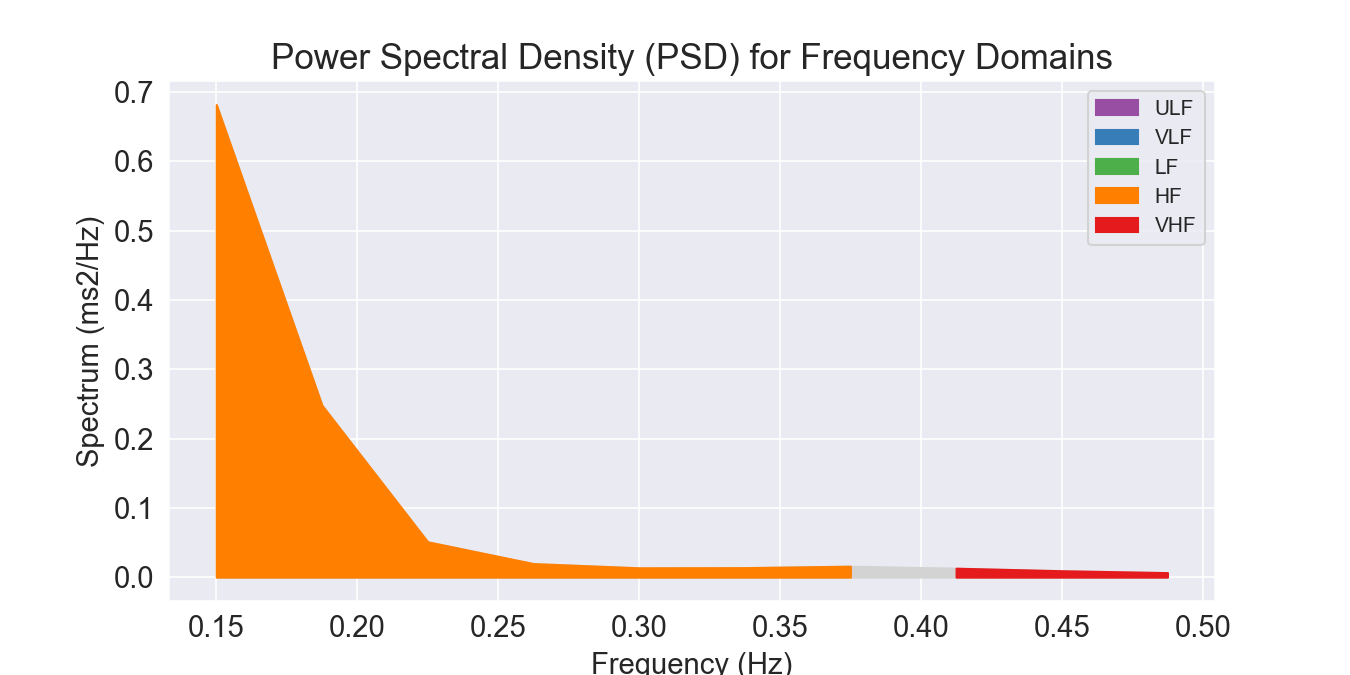

<IPython.core.display.Javascript object>


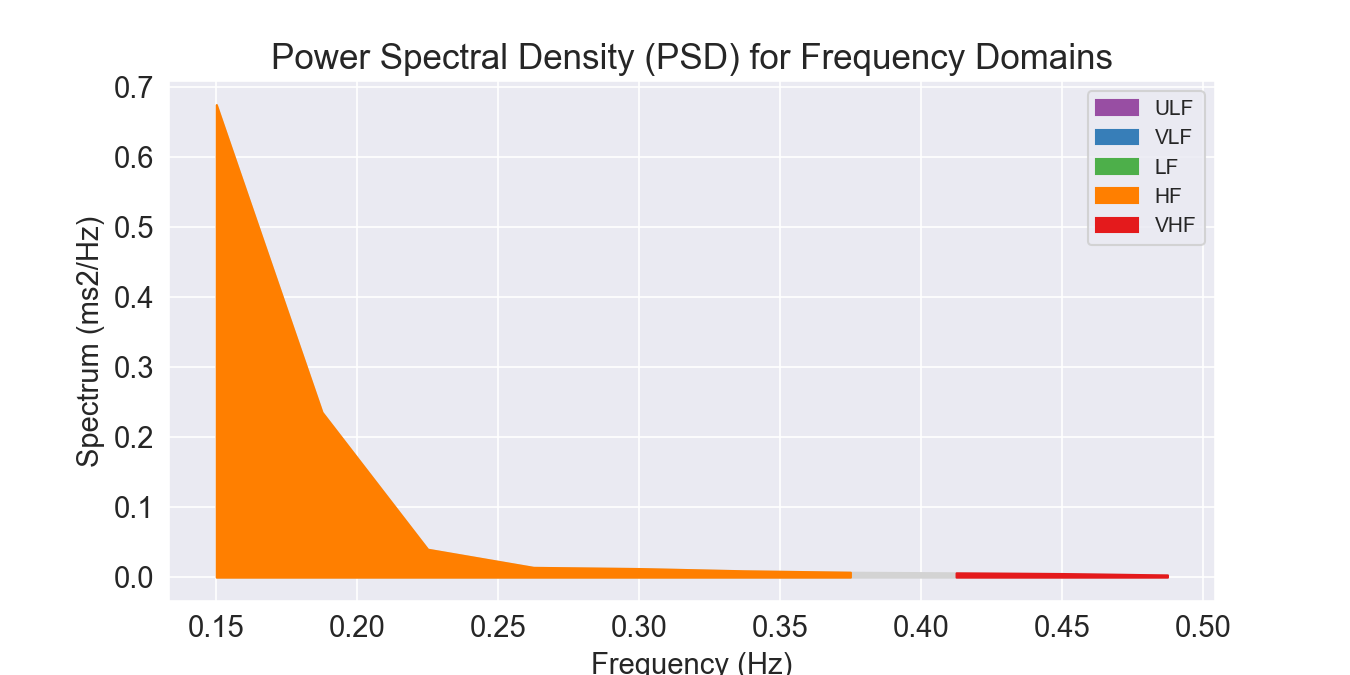

<IPython.core.display.Javascript object>


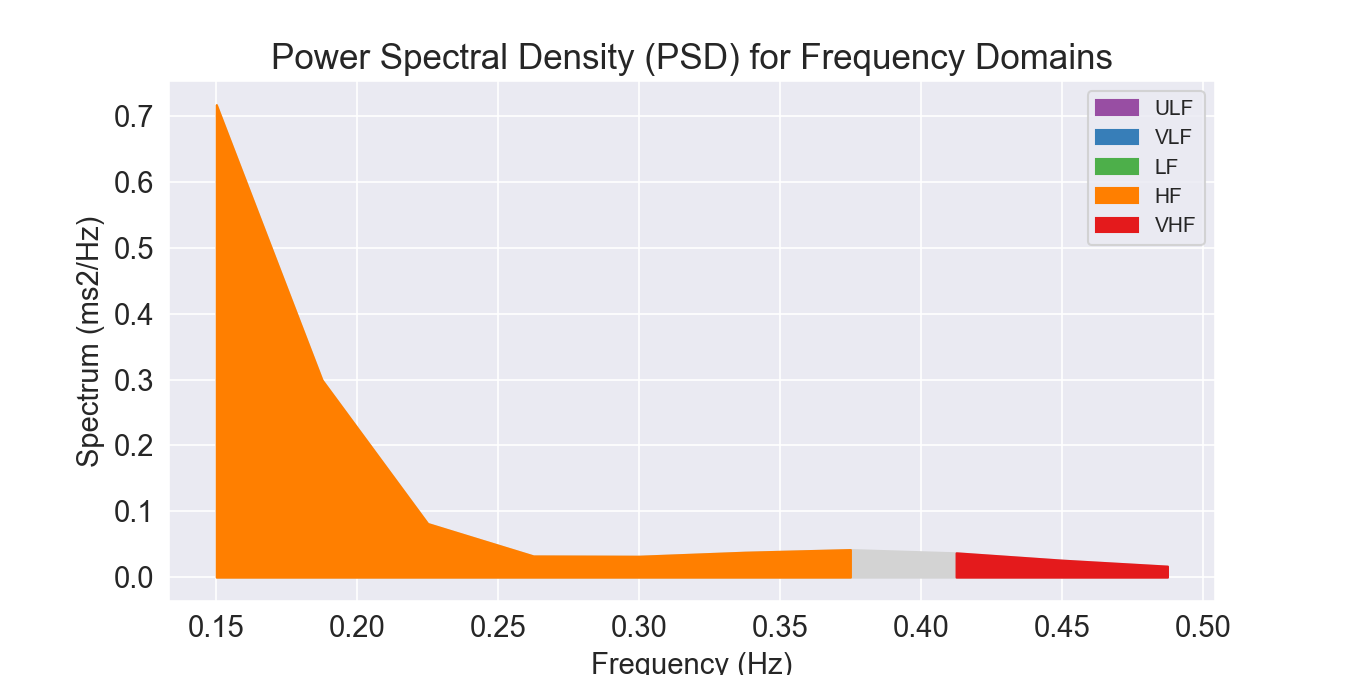

<IPython.core.display.Javascript object>


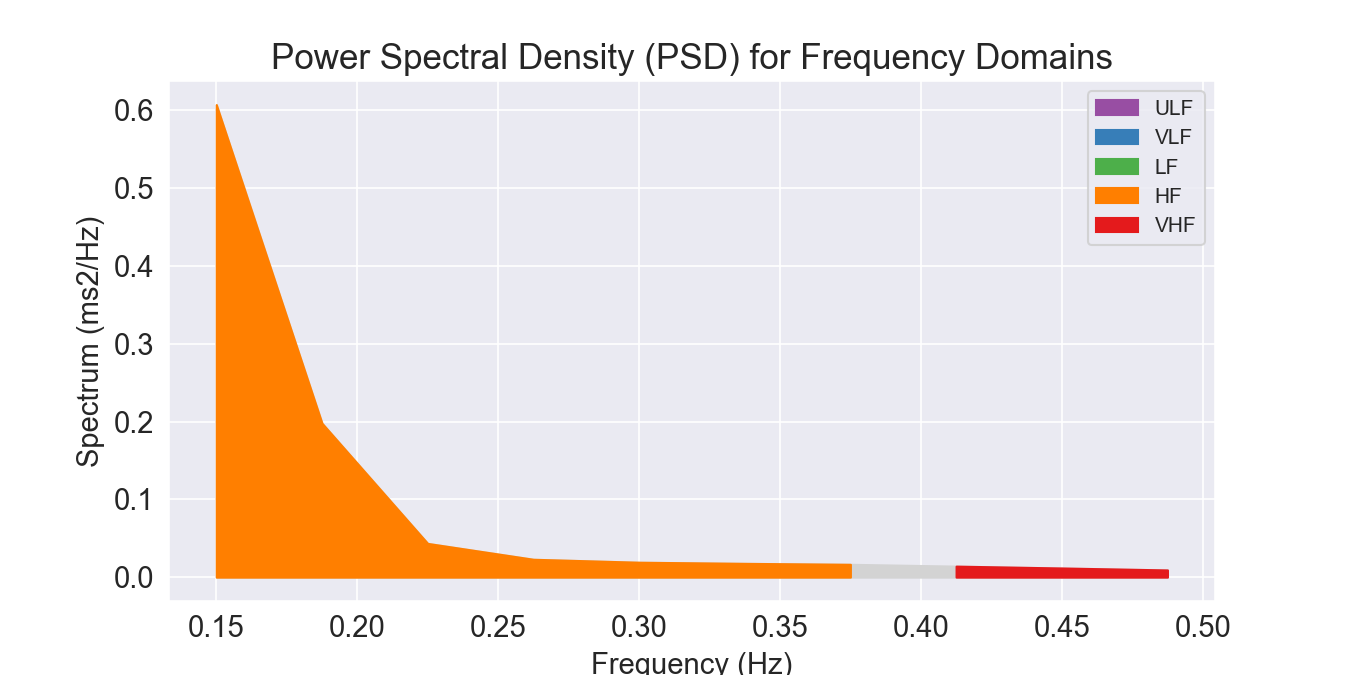

In [11]:
hrv_high = []
for index in range(1,5):
    
    condition = 'High'


    peaks_all = pi_high_tl[index]['ECG_R_Peaks'][:]
    hrv_high.append(nk.hrv_frequency(peaks_all, sampling_rate=sampling_rate, show=True))
    plt.savefig('../data/part'+str(part_number)+'/figures/'+condition + ' TL instance ' + str(index) + ' PSD All 50s.jpg')


C:\Users\BIOPACMan\Anaconda3\lib\site-packages\neurokit2\hrv\hrv_frequency.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  __, ax = plt.subplots()


<IPython.core.display.Javascript object>


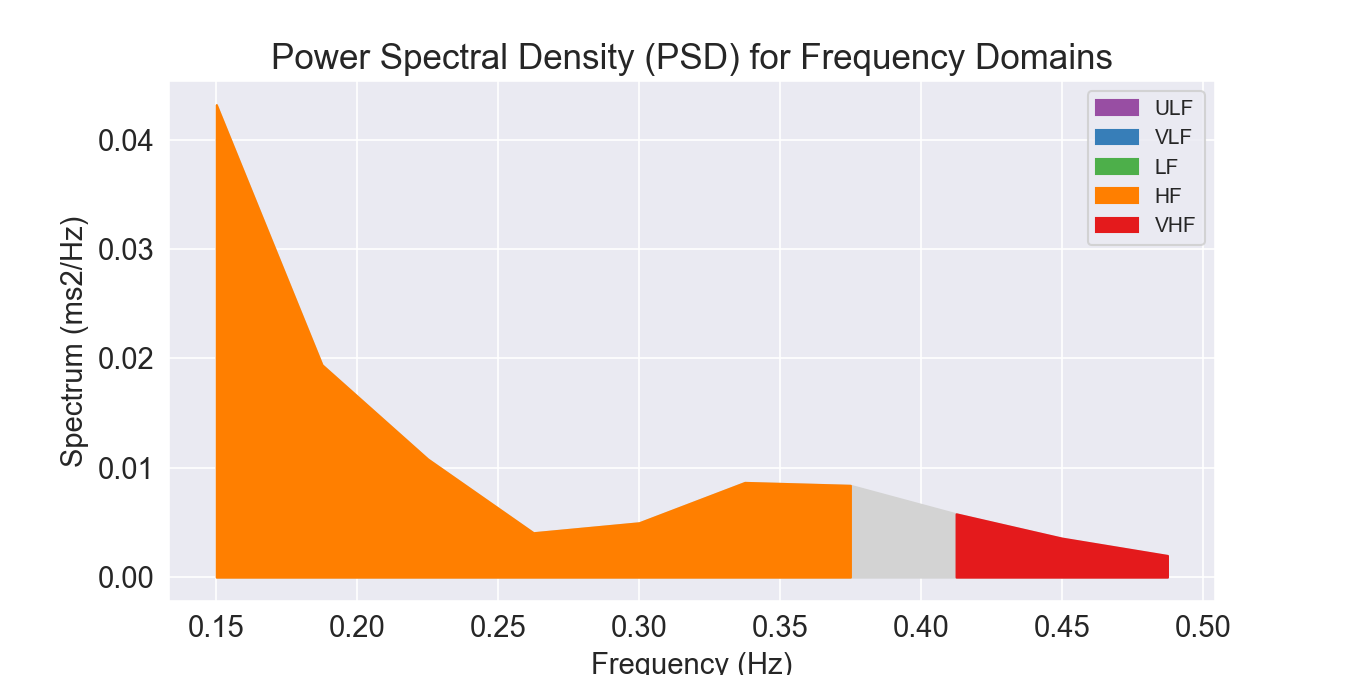

<IPython.core.display.Javascript object>


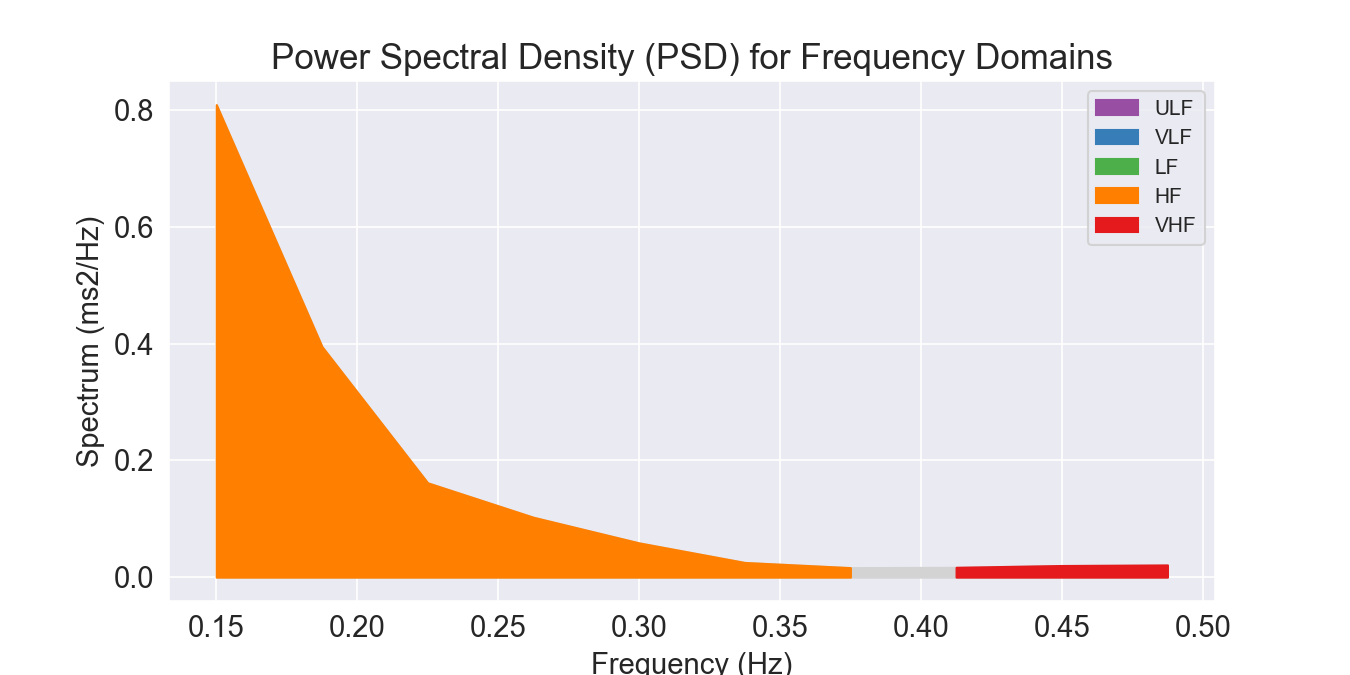

<IPython.core.display.Javascript object>


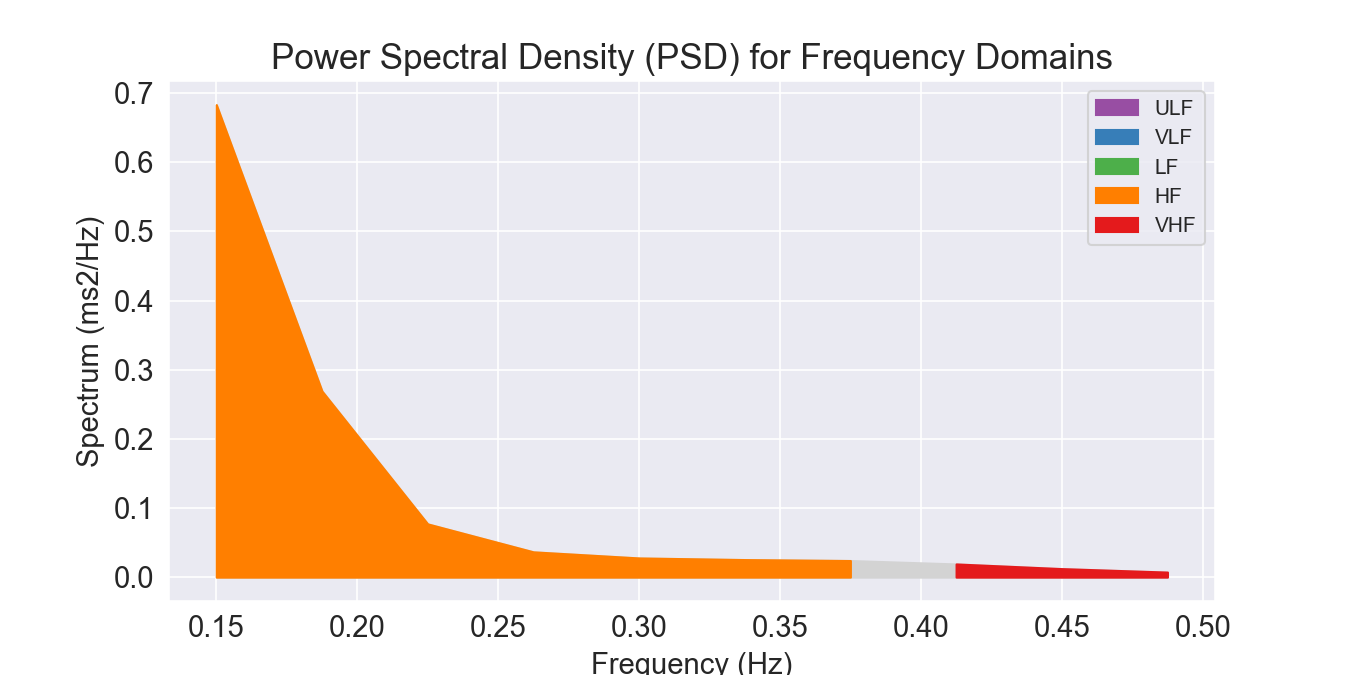

<IPython.core.display.Javascript object>


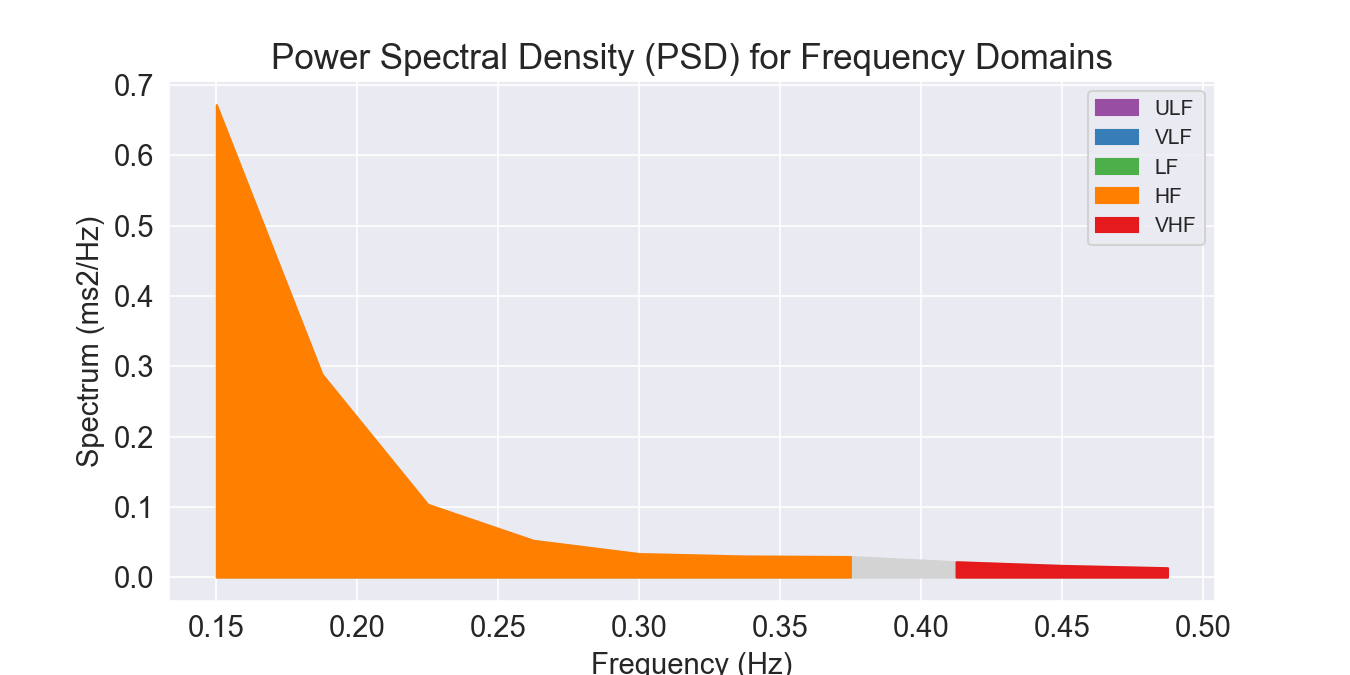

In [14]:

condition = 'Medium'
hrv_med = []
for index in range(1,5):
    peaks_all = pi_med_tl[index]['ECG_R_Peaks'][:]
    hrv_med.append(nk.hrv_frequency(peaks_all, sampling_rate=sampling_rate, show=True))
    plt.savefig('../data/part'+str(part_number)+'/figures/'+condition + ' TL instance ' + str(index) + ' PSD All 50s.jpg')


<IPython.core.display.Javascript object>


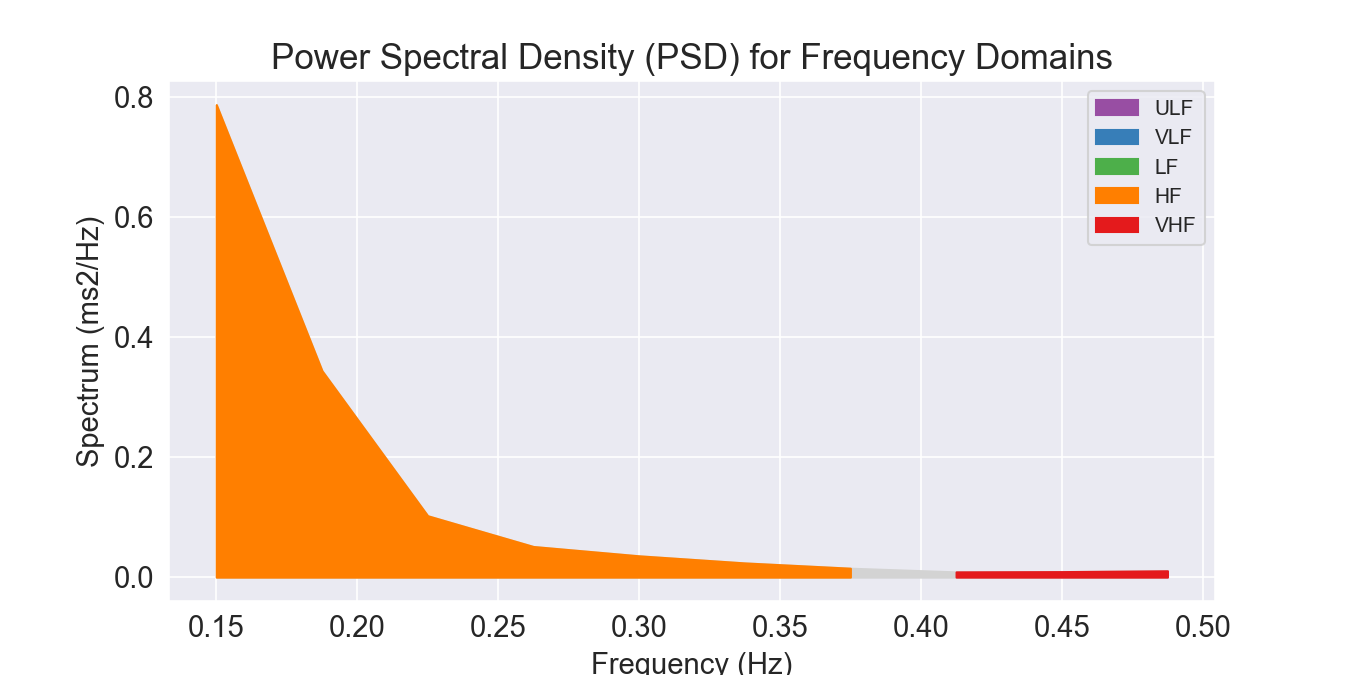

<IPython.core.display.Javascript object>


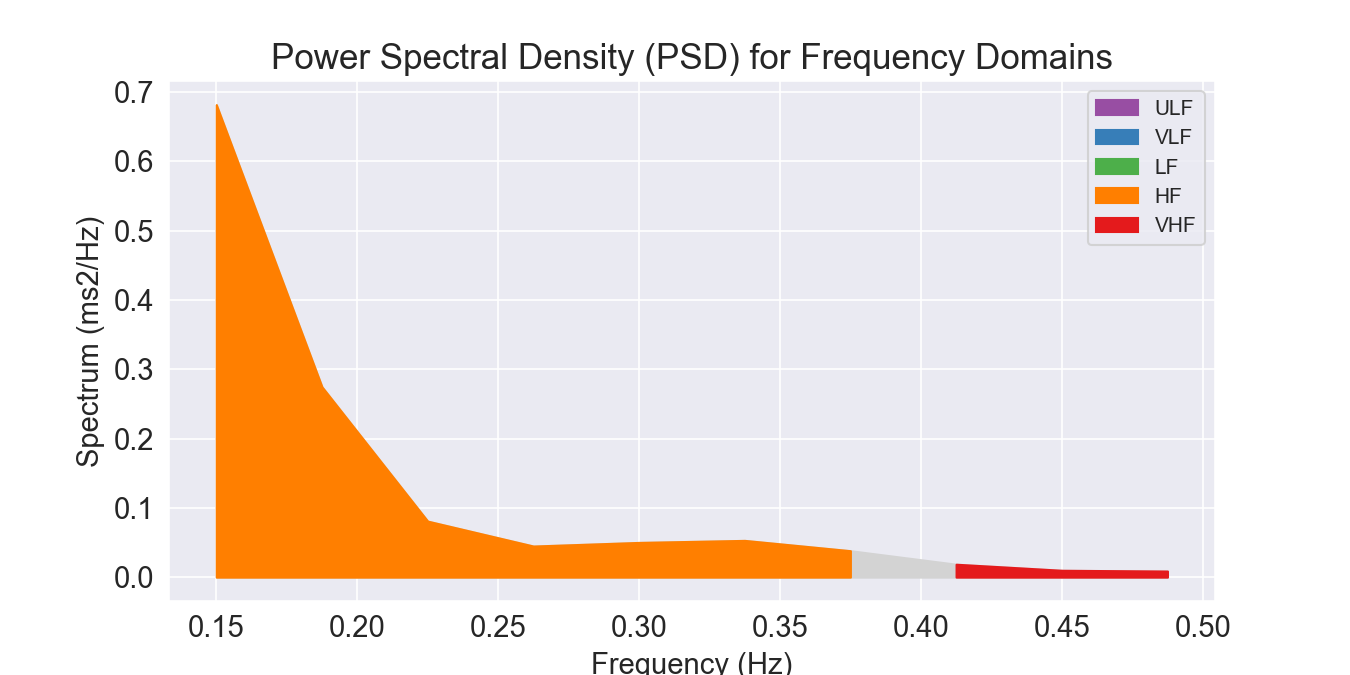

<IPython.core.display.Javascript object>


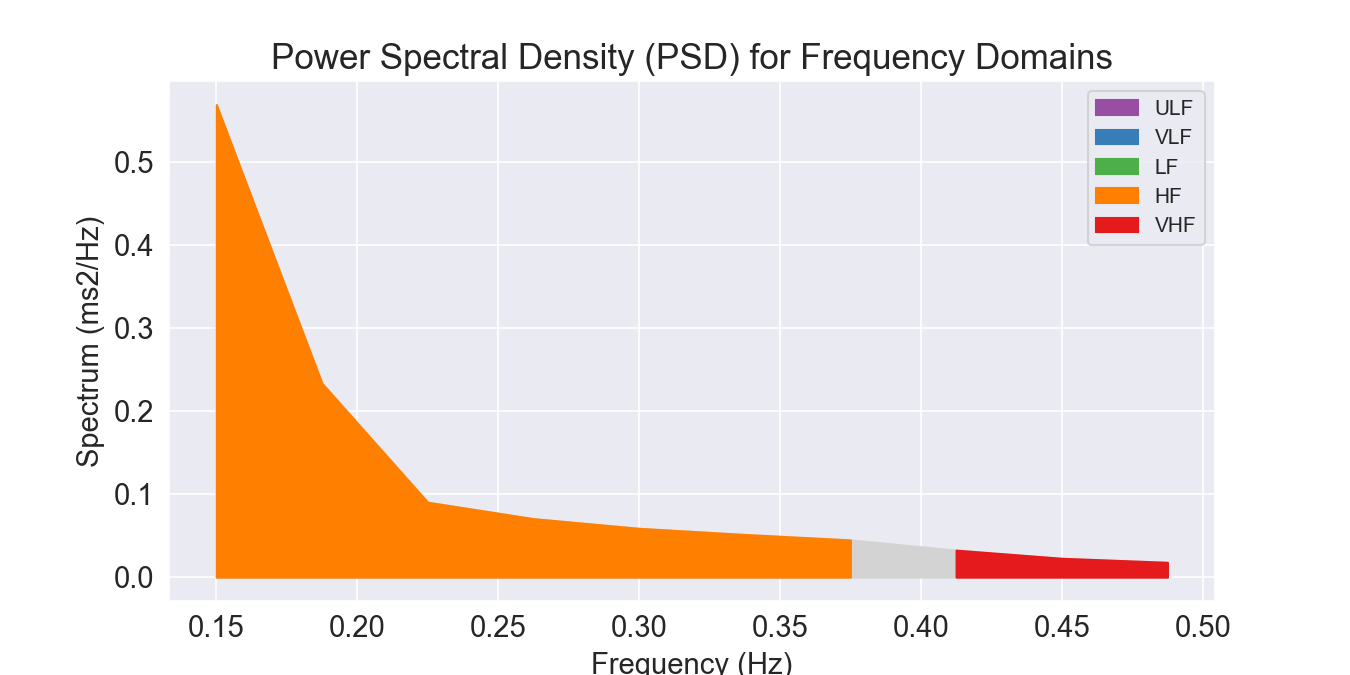

<IPython.core.display.Javascript object>


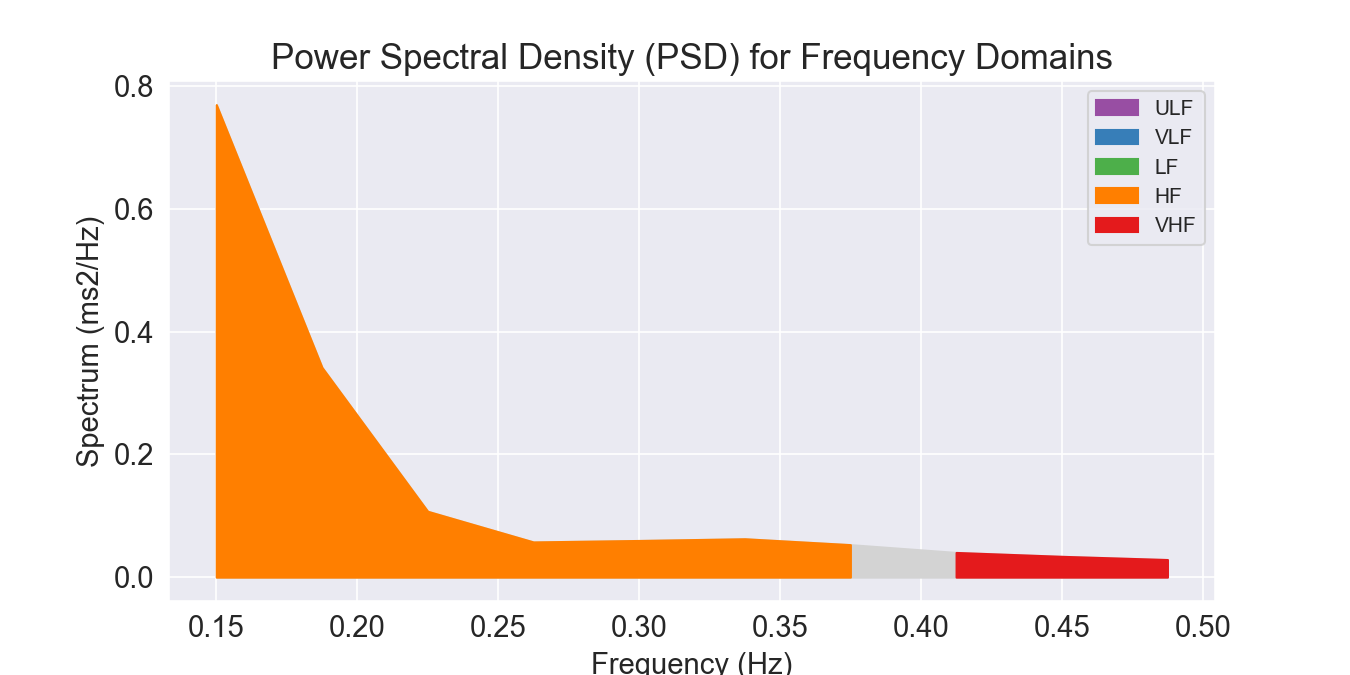

In [17]:

condition = 'Low'
hrv_low = []
for index in range(1,5):
    peaks_all = pi_low_tl[index]['ECG_R_Peaks'][:]
    hrv_low.append(nk.hrv_frequency(peaks_all, sampling_rate=sampling_rate, show=True))

    plt.savefig('../data/part'+str(part_number)+'/figures/'+condition + ' TL instance ' + str(index) + ' PSD All 50s.jpg')


In [59]:
plt.close('all')

In [18]:
hrv_low

[   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.035871  0.000705       NaN      NaN  0.980717   
 
    HRV_LnHF  
 0 -3.327829  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn  HRV_HFn  \
 0      NaN      NaN     NaN  0.032373  0.000885       NaN      NaN   0.9734   
 
    HRV_LnHF  
 0 -3.430438  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.030389  0.001793       NaN      NaN  0.944278   
 
    HRV_LnHF  
 0 -3.493683  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.039009  0.002563       NaN      NaN  0.938352   
 
    HRV_LnHF  
 0 -3.243967  ]

In [19]:
filepath = '../data/part'+part_number+'/HRV_HFn.csv'
f=open(filepath,'ab')
for iind in range(4):
    np.savetxt(f,hrv_low[iind])
for iind in range(4):
    np.savetxt(f,hrv_med[iind])
for iind in range(4):
    np.savetxt(f,hrv_high[iind])
f.close()

In [20]:
hrv_high

[   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.026032  0.000709       NaN      NaN  0.973476   
 
    HRV_LnHF  
 0 -3.648417  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn  HRV_HFn  \
 0      NaN      NaN     NaN  0.024435  0.000368       NaN      NaN  0.98516   
 
    HRV_LnHF  
 0 -3.711743  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.032348  0.001975       NaN      NaN  0.942459   
 
    HRV_LnHF  
 0  -3.43121  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.022989  0.000879       NaN      NaN  0.963174   
 
    HRV_LnHF  
 0 -3.772734  ]

In [21]:
hrv_med

[   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF  HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.002765  0.00028       NaN      NaN  0.908149   
 
    HRV_LnHF  
 0 -5.890757  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.043343  0.001452       NaN      NaN  0.967578   
 
    HRV_LnHF  
 0  -3.13862  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.029612  0.000956       NaN      NaN  0.968726   
 
    HRV_LnHF  
 0 -3.519587  ,
    HRV_ULF  HRV_VLF  HRV_LF    HRV_HF   HRV_VHF  HRV_LFHF  HRV_LFn   HRV_HFn  \
 0      NaN      NaN     NaN  0.032204  0.001286       NaN      NaN  0.961599   
 
    HRV_LnHF  
 0 -3.435666  ]

In [22]:
med_hrv_low = 0
med_hrv_high = 0
med_hrv_med = 0
for i in range(0,4):
    med_hrv_low+=hrv_low[i]['HRV_HFn']
    med_hrv_high+=hrv_high[i]['HRV_HFn']
    med_hrv_med += hrv_med[i]['HRV_HFn']
med_hrv_low = med_hrv_low/4
med_hrv_high = med_hrv_high/4
med_hrv_med = med_hrv_med/4
print(med_hrv_low)
print(med_hrv_med)
print(med_hrv_high)


0    0.959187
Name: HRV_HFn, dtype: float64
0    0.951513
Name: HRV_HFn, dtype: float64
0    0.966067
Name: HRV_HFn, dtype: float64


In [65]:
combine = pd.concat([pi_high_tl[1]['ECG_R_Peaks'][:],
                     pi_high_tl[2]['ECG_R_Peaks'][:],
                     pi_high_tl[3]['ECG_R_Peaks'][:],
                     pi_high_tl[4]['ECG_R_Peaks'][:]])
nk.hrv_frequency(combine, sampling_rate=sampling_rate, show=True)
#plt.title('High TL PSD')

<IPython.core.display.Javascript object>

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.023353,0.026916,0.004069,0.867598,0.429764,0.495349,-3.61502


In [66]:
combine = pd.concat([pi_low_tl[1]['ECG_R_Peaks'][:],
                     pi_low_tl[2]['ECG_R_Peaks'][:],
                     pi_low_tl[3]['ECG_R_Peaks'][:],
                     pi_low_tl[4]['ECG_R_Peaks'][:]])
nk.hrv_frequency(combine, sampling_rate=sampling_rate, show=True)
#plt.title('Low TL PSD')

<IPython.core.display.Javascript object>

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.043153,0.029922,0.007147,1.442171,0.537918,0.372992,-3.509164


In [67]:
combine = pd.concat([pi_med_tl[1]['ECG_R_Peaks'][:],
                     pi_med_tl[2]['ECG_R_Peaks'][:],
                     pi_med_tl[3]['ECG_R_Peaks'][:],
                     pi_med_tl[4]['ECG_R_Peaks'][:]])
nk.hrv_frequency(combine, sampling_rate=sampling_rate, show=True)

<IPython.core.display.Javascript object>

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.026203,0.01879,0.00407,1.394513,0.534067,0.382978,-3.974423


In [68]:
plt.close('all')